# Homework 3

Alberto Quaini

### Import libraries

In [3]:
import numpy as np
import quantecon as qe
import quantecon.markov.core as mkv
import matplotlib.pyplot as plt


## Exercise 1

Transition matrix for wealth percentiles going from one generation to the next.

In [4]:
P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]

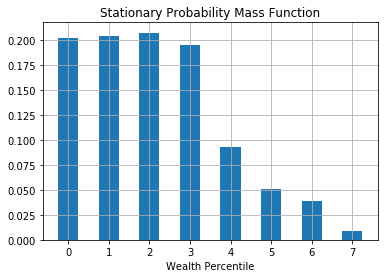

In [15]:
# Cast P in MarkovChain class
Mkv = mkv.MarkovChain(P)

stationary_pmf = mkv.mc_compute_stationary(Mkv.P)

plt.bar(range(8), stationary_pmf[0], width = 0.5)
plt.xlabel('Wealth Percentile')
plt.title('Stationary Probability Mass Function')
plt.grid(True)
plt.show()

## Exercise 2

### Simulate a single sample path of size T

In [16]:
def sim_time_pmf(markov, T = 10_000):
    # simulate one sample path from a markov chain, T periods
    simulated_path = markov.simulate(ts_length = T)
    # get number of states
    n, p = markov.P.shape
    
    # calculate the frequency of each state
    simulated_pmf = np.zeros(n)
    for i in range(n):
        ind_i = simulated_path == i
        simulated_pmf[i] = ind_i.sum() / T
        
    return simulated_pmf

### Plot

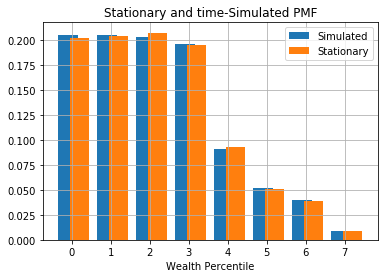

In [17]:
simulated_pmf = sim_time_pmf(Mkv)
bins = np.arange(8)

plt.bar(bins - 0.1, simulated_pmf, width = 0.5, label = 'Simulated')
plt.bar(bins + 0.2, stationary_pmf[0], width = 0.5, label = 'Stationary', )
plt.xlabel('Wealth Percentile')
plt.title('Stationary and time-Simulated PMF')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

## Exercise 3

### Simulate N sample paths of size T and consider the last one

In [18]:
def sim_cross_pmf(markov, T = 1_000, N = 10_000):
    # simulate one sample path from a markov chain, T periods
    simulated_path = markov.simulate(ts_length = T, num_reps = N)
    # get number of states
    n, p = markov.P.shape
    
    # calculate the frequency of each state at t = T
    simulated_pmf = np.zeros(n)
    for i in range(n):
        ind_i = simulated_path[:, T - 1] == i
        simulated_pmf[i] = ind_i.sum() / N
        
    return simulated_pmf

### Plot for T = 1

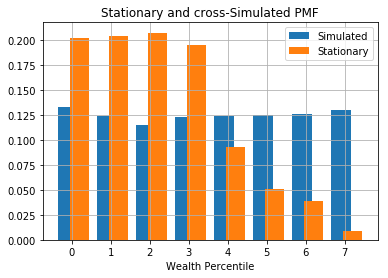

In [19]:
simulated_pmf = sim_cross_pmf(Mkv, T=1)
bins = np.arange(8)

plt.bar(bins - 0.1, simulated_pmf, width = 0.5, label = 'Simulated')
plt.bar(bins + 0.2, stationary_pmf[0], width = 0.5, label = 'Stationary')
plt.xlabel('Wealth Percentile')
plt.title('Stationary and cross-Simulated PMF')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

T = 1 is not enough to get a good approximation of the stationary PMF.

### Plot for T = 5

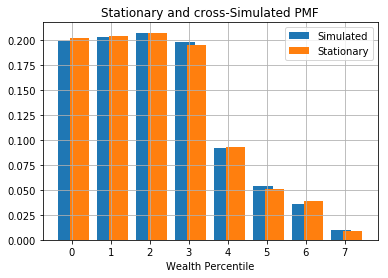

In [20]:
simulated_pmf = sim_cross_pmf(Mkv, T=5)
bins = np.arange(8)

plt.bar(bins - 0.1, simulated_pmf, width = 0.5, label = 'Simulated')
plt.bar(bins + 0.2, stationary_pmf[0], width = 0.5, label = 'Stationary')
plt.xlabel('Wealth Percentile')
plt.title('Stationary and cross-Simulated PMF')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

T = 5 is already enough to get a good approximation of the stationary PMF.